## 비지도 학습

비지도 학습
- 결과값이 없이 입력값만 주고 학습을 시켜서 유사성을 파악하게 하는 방식 (정답 없음)
- 데이터의 숨겸진 특징이나 구조를 발견하는 데 사용
- 정답이 없는 입력 데이터만 이용하기 때문에 
- 입력값 자체의 특성과 분포만을 파악해서 그룹핑하는 군집화에 주로 사용

비지도 학습 유형
- 비지도 변환
- 군집 (clustering)

비지도 변환
- 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
- 차원 축소 : 만흥 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법
    - 수백 개 이상의 피처로 구성된 데이터 셋의 경우
    - 피처 수가 상대적으로 적은 하원에서 학습한 모델보다 예측 신뢰도가 떨어지고
    - 피처 간의 상관 관계가 높아질 가능성이 커짐
    - 선형 회귀와 같은 선형 모델에서는 입력한 변수들 간의 상관관계가 높을 수록 다중공선상 문제로 
    - 모델의 예측 성능이 떨어질 수가 있음
- 비지도 변환으로 데이터를 구성하는 단위나 성분을 검색 : 많은 텍스트 문서에서 주제 추출    

군집 (Clustering)
- 데이터를 비슷한 것끼리 그룹으로 묶는 작업
- K-평균
- DBSCAN

군집화
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고
- 서로 다른 군집들이 상이성을 가지도록 그굽화

### K-평균 알고리즘

K-평균 (K-Means)
- 군집화에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의 지점을 선택해서
- 해당 중심에 가까운 포인트들을 선택하는 군집화 기법

K-평균 동작 원리
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고
- 이동된 중심점에서 다시 가까운 포인트를 선택,
- 다신 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고
- 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

In [ ]:
# 그림 군집 동작 원리

K-평균의 장점과 단점

장점
- 알고리즘이 쉽고 간결
- 대용량 데이터에도 활용 가능
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘

단점
- 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
- (PCA로 차원 축소 적용 필요할 수도 있음)
- 반복 횟수가 많을 경우 수행 시간 느려짐
- 이상치 데이터에 취약
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

사이킷런의 KMeans 클래스 사용

주요 파라미터
- n_clusters : 군집화할 개수. 즉, 군집 중심점의 개수
- init : 초기에 군집 중심점의 좌표를 설정하는 방식
    - 일반적으로 k-means++ 방식으로 최초 설정
  
k-means++
- 전통적인 K-Means의 문제를 해결하기 위해 새로 생긴 방식
- K-Means : 시작 시 중심점을 무작위로 선졍
- 데이터 포인트 중에서 무작위로 1개를 선택해서 첫 번째 중심점으로 지정
- 나머지 데이터들은 첫 번째 중심점까지의 거리를 계산
- 두 번째 중심점은 각 점들로부터 거리에 비례한 확률에 따라 선택

K-Means 메서드
- fit() / transform()
- fit_transform()

군집화 관련 주요 속성
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_cneters_ : 각 군집 중심점 좌표

### K-Means을 이용한 붓꽃 데이터 셋 군집화 (Clustering)

붓꽃 데이터를 이용해서 K-평균 군집화 수행
- 꽃받침, 꽃잎의 길에 따라 각 데이터의 군집화가 어떻게 결정되는 확인하고
- 이를 분류값과 비교

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

# 데이터 프레임으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### KMeans 객체 생성하고 군집화 수행

In [7]:
# 붓꽃 데이터 셋을 3개의 그룹으로 군집화
# KMeans(그룹 수, 초기 중심 설정 방식(디폴트), 최대 반복 횟수, 랜덤 스테이트)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [8]:
# labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid) 확인
print(kmeans.labels_)

# 결과
# 0, 1, 2 : 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
# 군집화가 효과적으로 됐는지 확인하기 위해
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 확인
# target, cluster 칼럼 추가
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


In [10]:
# target과 cluster 값 개수 비교
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

# 결과
# 분류 타깃 0 : 50개 전체가 1번 군집으로 그룹핑
# 분류 타깃 1 : 2개만 2번, 48개가 0번 군집으로 그룹핑
# 분류 타깃 2 : 14개가 0번, 36개가 2번 군집으로 그룹핑

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [13]:
irisDF.groupby(['target']).count()

,sepal_length,sepal_width,petal_length,petal_width,cluster
target,,,,,
0,50,50,50,50,50
1,50,50,50,50,50
2,50,50,50,50,50


In [14]:
irisDF.groupby(['cluster']).count()

,sepal_length,sepal_width,petal_length,petal_width,target
cluster,,,,,
0,62,62,62,62,62
1,50,50,50,50,50
2,38,38,38,38,38


In [15]:
irisDF.groupby(['target', 'cluster']).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

### 붓꽃 데이터 셋의 군집화를 시각화
- 2차원 평면상에 개별 데이터의 군집화를 시각적으로 표현
- 붓꽃 데이터 셋의 속성이 4개이므로, 2차원 평면에 적합지 않기 때문에
- PCS를 이용해서 4개의 속성을 2개로 차원 축소한 뒤에 
- X좌표, Y좌표로 개별 데이터 표현

In [ ]:
# 사이킷런의 PCA 클래스 사용해서 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

In [23]:
# pca_transformed

# [[-2.68412563,  0.31939725],
#  [-2.71414169, -0.17700123],

In [24]:
irisDF['pca_x'] = pca_transformed[:, 0] # 첫 번째 값 (X 좌표)
irisDF['pca_y'] = pca_transformed[:, 1] # 두 번째 값 (Y 좌표)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


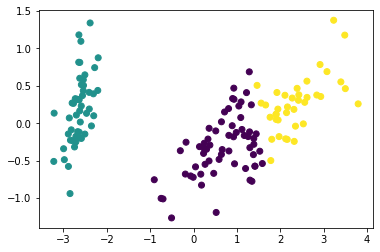

In [25]:
# 산점도로 표현 : 색상만 다르게 표시
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster'])

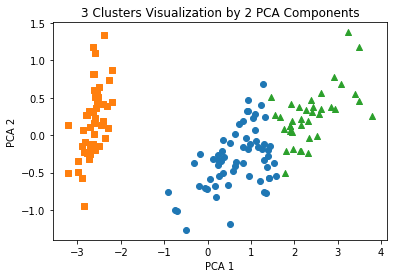

In [27]:
# 군집마다 모양 다르게 표현

# cluster 값이 0, 1, 2인 경우마다 별도의 index 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# matplotlib의 산점도(scatter)에서 한 번에 여러 개의 마커를 표현할 수 없으므로
# 마커별로 별도의 산점도 수행
# cluster 값 0, 1, 2에 해당하는 index로
# 각 cluster 레벨의 pca_x, pca_y 값 추출해서
# o, s, ^로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') # 원
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s') # 네모
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^') # 세모

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#  결과
# Cluster1을 나타내는 네모는 명확히 다른 군집과 잘 분리돼어 있음
# Cluster0을 나타내는 동그라미와 Cluster2를 나타내는 세모는 상당 수준 분리되어 있지만
# 네모만큼 명확하게 분리되어 있지 않음
# 속성의 위치 자체가 명확히 분리되기 어려움 부분이 존재

### 군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런의 대표적인 군집화용 데이터 생성기 사용
- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 추가 되어있음
- make_classification() : 노이즈를 포함한 데이터를 만드는데 유용하게사용
- 둘 다 비슷하게 여러 개의 클래스에 해당하는 데이터 세트 생성하는데
- 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능
- 둘 중에 어떤 것을 사용하는 큰 차이는 없음
- 둘 다 분류용 테스트 데이터 생성 가능
- 이 외에도 make_circle(), make_moon() API는 중심 기반의 군집화로
- 해결하기 어려운 데이터 세트를 만드는데 사용

make_blobs()의 주요 파라미터

* n_samples: 생성할 총 데이터의 개수. 디폴트는 100개. 
    
* n_features: 데이터의 피처 개수 
    - 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 
    - 두 번째 피처는 y 좌표상에 표현  

* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수
    - 그렇지 않고 ndarray 형태로 표현할 경우 
    - 개별 군집 중심점의 좌표를 의미  

* cluster_std: 생성될 군집 데이터의 표준 편차
    - 만일 float 값 0.8과 같은 형태로 지정하면 
    - 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐   
    - [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 
    - 첫 번째 군집 내 데이터의 표준편차는 0.8, 
    - 두 번째 군집 내 데이터의 표준 편차는 1.2, 
    - 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듦
    - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용 

In [30]:
# 군집화 알고리즘 테스트를 위한 데이터 생성

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# make_blobs(총 데이터 수=200, 피처 수=2, 군집 수=3, 표준 편차, 랜덤 스테이트)
# X, y 반환
# X : 피처 데이터 세트 (총 200개의 레코드(데이터 건수, 행)와 2개의 피처가 3개의 군집화 기반 분포)
# y : 타깃 데이터 세트 ( 3개의 군집화 값)

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

# 결과
# 피처 데이터 세트 X : 200개의 레코드와 2개의 피처로 구성(200, 2)
# 군집 타깃 데이터 세트 y : 값 200개(200, )
# 3개의 클러스 값 : [0 1 2], 각 67, 67, 66개로 균일하게 구성되어 있음

(200, 2) (200,)
[0 1 2] [67 67 66]


In [31]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [32]:
np.unique(y)

array([0, 1, 2])

In [33]:
# 가공작업을 좀 더 편리하게 하기 위해 데이터 프레임으로변환
# 피처명 :ftr1, ftr2

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


### make_blob()으로 만들어지 데이터 포인트를 시각화

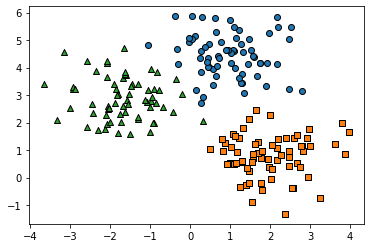

In [34]:
# make_blob()으로 만든 피처 데이터 셋이
# 어떤 군집화 분포를 가지고 만들어졌는지 확인

# 산점도를 마커별로 생성하기 위해 타깃 리스트 생성
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로
# 타깃 리스트는 [0, 1, 2]
target_list= np.unique(y)

# 각 타깃별로 scatter plot의 marker 값 리스트 생성
markers = ['o', 's', '^' , 'P', 'D', 'H', 'X'] 
# markers = ['o', 's', '^'] # 3개만 있어도 됨

# 타깃 리스트의 각 cluster 별로 마커 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
    
plt.show()

# 결과
# 타깃값 0, 1, 2에 따라 마커를 다르게 산점도로 표현하면
# 3개의 구분될 수 있는 군집 영역(y값)으로 
# 피처 데이터 셋이 만들어진 것 확인

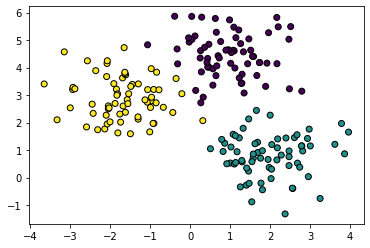

In [37]:
# 각 cluster별로 마커 생성하지 않고 표현
target_list= np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y)


### K-Means 클러스터링을 수행하고 개별 클러스의 중심 위치를 시각화

- K-Means 군집화 수행 후 군집별로 시각화하고
- 개별 군집의 중심 위치 좌표 표시
- cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표

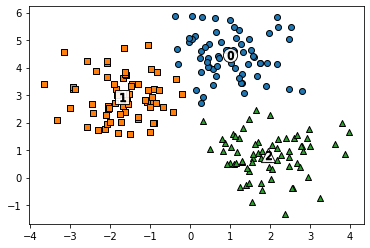

In [47]:
# KMeans 객체를 이용해서 X 데이터를 K-Means 클러스터링 수행
# X 데이터 : make_blob()으로 생성한 피처 데이터 세트
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표
# 개별 클러스터 중심의 위치 좌표 시각화를 위해추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^' , 'P', 'D', 'H', 'X'] 
# markers = ['o', 's', '^'] # 3개만 있어도 됨

# 군집된 label 유형별로 반복하면서 marker별로 scatter plot 수행
for label in unique_labels:
    # 군집별 마커로 산점도 표현
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    # 중심 좌표에 마커별 표시
    center_x_y = centers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, 
                edgecolor='k', marker=markers[label])
    
    # 마커 내에 레이블 값 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

# $ : matplotlib 수학적 표기 의미
# %d : 숫자값 출력 의미
# % label : 출력되는 레이블 값 (레이블 값을 %d 위치에 출력)

In [46]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [49]:
# target 값과 Kmeans_label 값 맵핑 확인
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

# 결과
# target 0 : label 0으로 66개, label 1로 1개
# target 1 : 모두 label 2로 67개
# target 2 : label 1로 65개, label 2로 1개



target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### make_blobs()의 데이터 분포도 조절

cluster_std 파라미터 값으로 데이터의 분포도 조절  
cluster_std 값이 작을수록 군집 중심에 데이터가 모여 있고  
클수록 데이터가 퍼져 있음  

In [66]:
# 군집화 알고리즘 테스트를 위한 데이터 생성

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# make_blobs(총 데이터 수=200, 피처 수=2, 군집 수=3, 표준 편차, 랜덤 스테이트)
# X, y 반환
# X : 피처 데이터 세트 (총 200개의 레코드(데이터 건수, 행)와 2개의 피처가 3개의 군집화 기반 분포)
# y : 타깃 데이터 세트 ( 3개의 군집화 값)

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

# 결과
# 피처 데이터 세트 X : 200개의 레코드와 2개의 피처로 구성(200, 2)
# 군집 타깃 데이터 세트 y : 값 200개(200, )
# 3개의 클러스 값 : [0 1 2], 각 67, 67, 66개로 균일하게 구성되어 있음

(200, 2) (200,)
[0 1 2] [67 67 66]


In [67]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.857950,4.326169,2
1,0.419611,4.553946,0
2,1.224186,4.908847,0


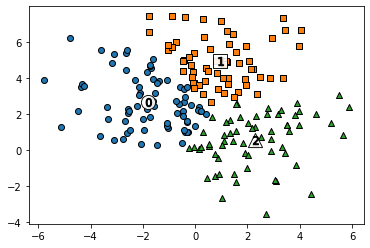

In [68]:
# KMeans 객체를 이용해서 X 데이터를 K-Means 클러스터링 수행
# X 데이터 : make_blob()으로 생성한 피처 데이터 세트
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표
# 개별 클러스터 중심의 위치 좌표 시각화를 위해추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^' , 'P', 'D', 'H', 'X'] 
# markers = ['o', 's', '^'] # 3개만 있어도 됨

# 군집된 label 유형별로 반복하면서 marker별로 scatter plot 수행
for label in unique_labels:
    # 군집별 마커로 산점도 표현
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    # 중심 좌표에 마커별 표시
    center_x_y = centers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, 
                edgecolor='k', marker=markers[label])
    
    # 마커 내에 레이블 값 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [69]:
# target 값과 Kmeans_label 값 맵핑 확인
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       1               53
        0                8
        2                6
1       2               55
        0                8
        1                4
2       0               58
        1                6
        2                2
Name: kmeans_label, dtype: int64


In [ ]:
# cluster_std 값이 클수록 데이터가 퍼져 있음

0.4
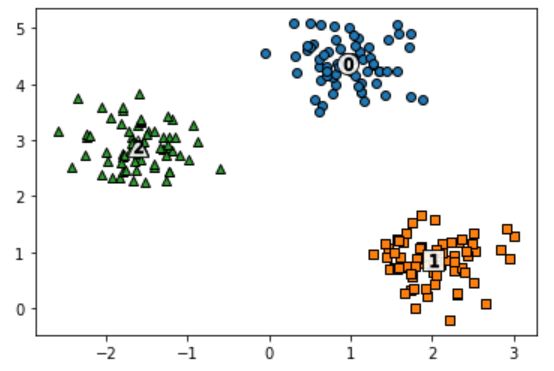

0.8   
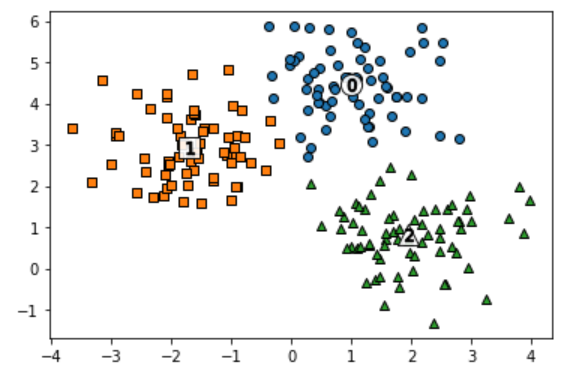

1.2
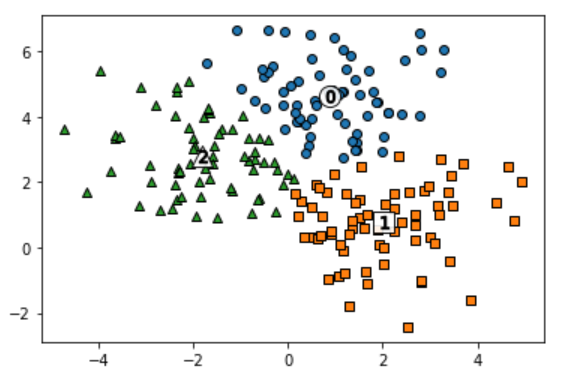

1.6
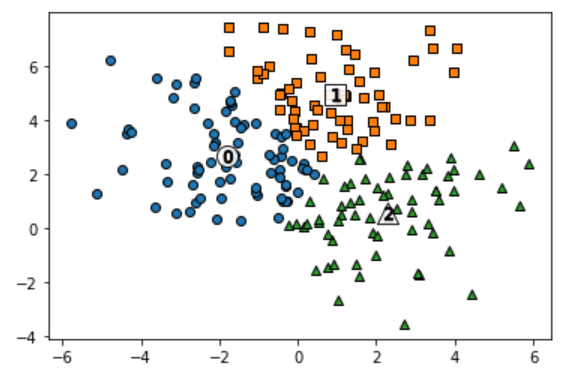